In [1]:
import os 
import numpy as np 
import json
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from nutil.plot import paperStyle
import seaborn as sns


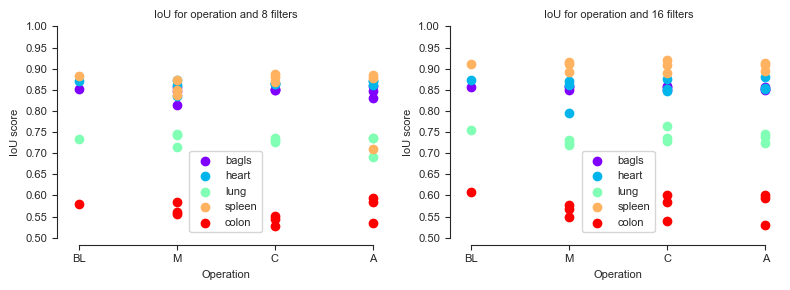

In [47]:
def plot_all():
    folders = ["/bagls/", "/heart/", "/lung/", "/spleen/", "/colon/"]
    operations = ["multiply", "concatenate", "add"]
    operation_labels = ["M", "C", "A"]
    nests = [1]
    nest_labels = ["BL"]
    filters = [8, 16]
    colors = cm.rainbow(np.linspace(0, 1, len(folders)))

    with paperStyle():
        fig, axs = plt.subplots(1, 2, figsize=(8, 3))
        for i, filter in enumerate(filters):
            ax = axs[i]
            for folder in folders:
                history_path = "./history"
                history_path += folder
                paths = [os.path.join(history_path, path) for path in os.listdir(history_path)]
                iou_scores = []
                operation_indices = []
                max_iou_score_baseline = 0

                for path in paths:
                    parts = path.split("_")
                    current_nest = int(parts[1])
                    current_filters = int(parts[2])
                    current_operation = parts[3].replace(".json", "")

                    if current_filters == filter:
                        with open(os.path.join(path), 'r') as f:
                            history = json.load(f)
                        current_iou = max(history['val_iou_score'])

                        if current_nest == 1:
                            max_iou_score_baseline = max(max_iou_score_baseline, current_iou)
                        else:
                            iou_scores.append(current_iou)
                            operation_indices.append(operation_labels[operations.index(current_operation)])

                iou_scores.insert(0, max_iou_score_baseline)
                operation_indices.insert(0, nest_labels[0])

                ax.scatter(operation_indices, iou_scores, marker='o', color=colors[folders.index(folder)], label=folder.replace("/", ""))

            ax.set_xlabel('Operation')
            ax.set_ylabel('IoU score')
            ax.set_title(f'IoU for operation and {filter} filters')
            ax.set_xticks(range(len(operation_labels + nest_labels)))
            ax.set_xticklabels(nest_labels + operation_labels)
            ax.set_ylim([0.5, 1])  
            ax.yaxis.set_major_locator(plt.MaxNLocator(10))  # Increase number of y-ticks
            ax.legend()
            sns.despine(trim=True, offset=5)

        plt.tight_layout()
        plt.show()

plot_all()

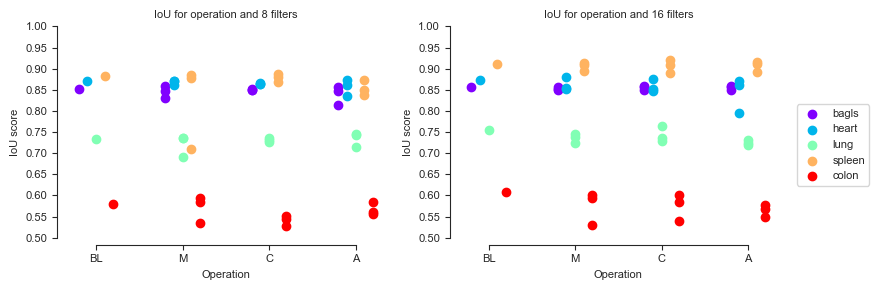

In [63]:
def plot_all():
    folders = ["/bagls/", "/heart/", "/lung/", "/spleen/", "/colon/"]
    operations = ["baseline", "multiply", "concatenate", "add"]
    operation_labels = ["BL", "M", "C", "A"]
    filters = [8, 16]
    colors = cm.rainbow(np.linspace(0, 1, len(folders)))
    offset = np.linspace(-0.2, 0.2, len(folders))  # offset for each dataset

    with paperStyle():
        fig, axs = plt.subplots(1, 2, figsize=(8, 3))
        lines = []  # to store the lines for the legend
        labels = []  # to store the labels for the legend

        for i, filter in enumerate(filters):
            ax = axs[i]
            for j, folder in enumerate(folders):
                history_path = "./history"
                history_path += folder
                paths = [os.path.join(history_path, path) for path in os.listdir(history_path)]
                iou_scores = []
                operation_indices = []
                max_iou_score_baseline = 0

                for path in paths:
                    parts = path.split("_")
                    current_nest = int(parts[1])
                    current_filters = int(parts[2])
                    current_operation = parts[3].replace(".json", "")

                    if current_filters == filter:
                        with open(os.path.join(path), 'r') as f:
                            history = json.load(f)
                        current_iou = max(history['val_iou_score'])

                        if current_nest == 1:
                            current_operation = "baseline"
                            max_iou_score_baseline = max(max_iou_score_baseline, current_iou)
                        else:
                            iou_scores.append(current_iou)
                            operation_indices.append(operations.index(current_operation))

                iou_scores.insert(0, max_iou_score_baseline)
                operation_indices.insert(0, operations.index("baseline"))

                line = ax.scatter(np.array(operation_indices) + offset[j], iou_scores, marker='o', color=colors[j])
                if i == 0:  # only add to the legend for the first subplot
                    lines.append(line)
                    labels.append(folder.replace("/", ""))

            ax.set_xlabel('Operation')
            ax.set_ylabel('IoU score')
            ax.set_title(f'IoU for operation and {filter} filters')
            ax.set_xticks(range(len(operation_labels)))
            ax.set_xticklabels(operation_labels)
            ax.set_ylim([0.5, 1])  
            ax.yaxis.set_major_locator(plt.MaxNLocator(10))  # Increase number of y-ticks

        fig.legend(lines, labels, loc='center right', bbox_to_anchor=(1.1, 0.5))  # create a single legend for the figure
        sns.despine(trim=True, offset=5)
        plt.tight_layout()
        plt.savefig("./images/iouvsoperation.svg", format="svg", bbox_inches='tight')
        plt.show()

plot_all()